# Importing Libraries

In [103]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler , OrdinalEncoder , StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score , recall_score , confusion_matrix


# Loading and Visualizing Data 

In [104]:
Cancer_set=pd.read_csv(r"C:\Users\Administrator\Desktop\my_lab\Breast Cancer\Breast_Cancer.csv")

In [105]:
Cancer_set.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [106]:
Cancer_set.info()
# no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [107]:
Cancer_set.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4024.0,53.972167,8.963134,30.0,47.0,54.0,61.0,69.0
Tumor Size,4024.0,30.473658,21.119696,1.0,16.0,25.0,38.0,140.0
Regional Node Examined,4024.0,14.357107,8.099675,1.0,9.0,14.0,19.0,61.0
Reginol Node Positive,4024.0,4.158052,5.109331,1.0,1.0,2.0,5.0,46.0
Survival Months,4024.0,71.297962,22.921430,1.0,56.0,73.0,90.0,107.0


In [108]:
object_data=Cancer_set.select_dtypes(include='object').columns
int_data=Cancer_set.select_dtypes(include='int64').columns

In [109]:
object_data.drop('Status' )

Index(['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Estrogen Status',
       'Progesterone Status'],
      dtype='object')

## Data Visualization

"In the visualization part, we will explore the relationship between the numerical and categorical features by plotting them separately (Histogram and Barchart and CorrelationMatrix)to gain a better understanding of their individual distributions and potential patterns."

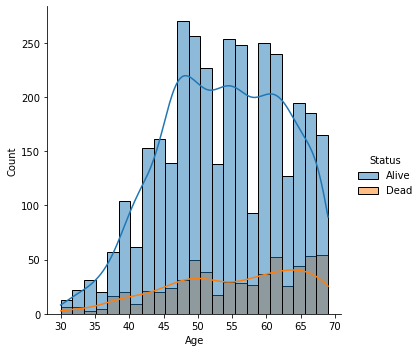

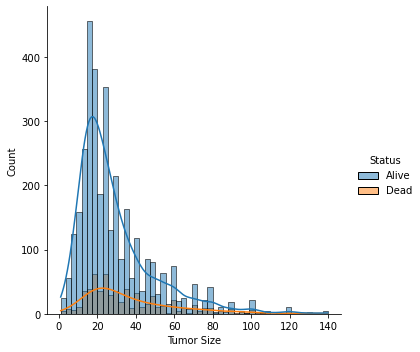

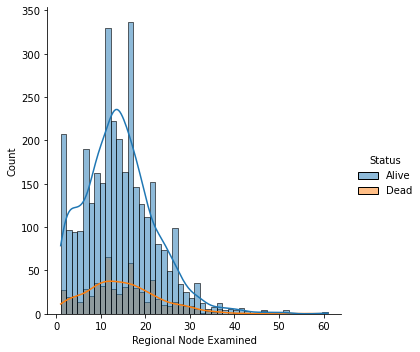

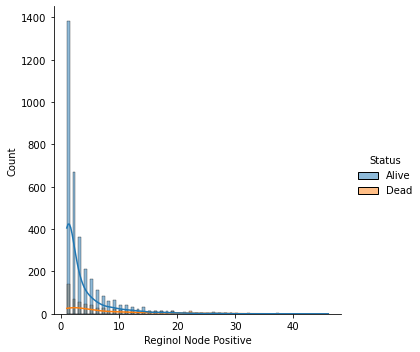

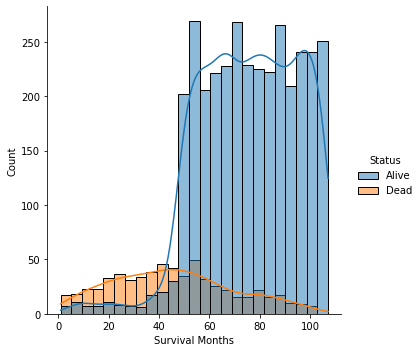

In [110]:
def numerical_plot(dataset , var1 ):
     return sns.displot( data=dataset , x=var1 , kde=True , hue="Status")
    
for col in int_data:
    numerical_plot(Cancer_set , col)

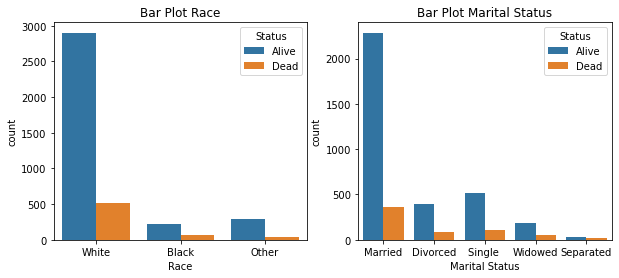

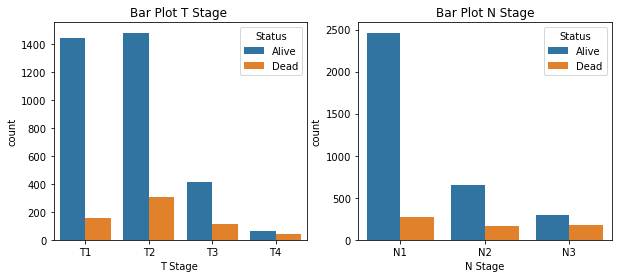

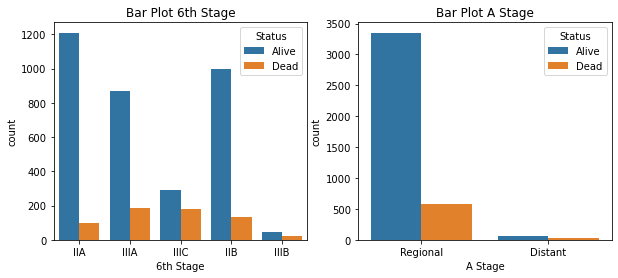

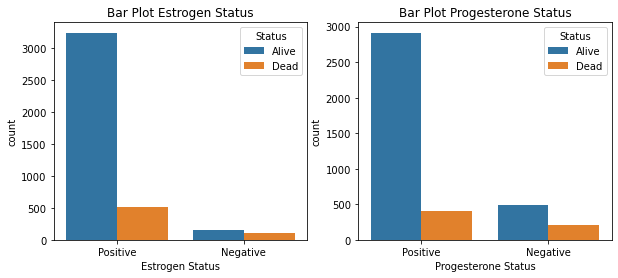

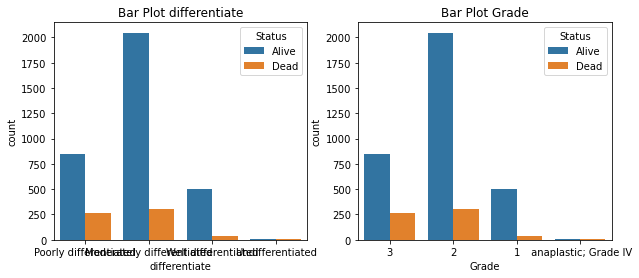

In [111]:
def plot_object(dataset , var1 , var2):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    sns.countplot(x=var1 , data=dataset, hue='Status',ax=axes[0])
    axes[0].set_title(f'Bar Plot {var1}')
    sns.countplot(x=var2,  data=dataset, hue='Status', ax=axes[1])
    axes[1].set_title(f'Bar Plot {var2}')
plot_object(Cancer_set , 'Race' , 'Marital Status')
plot_object(Cancer_set , 'T Stage ', 'N Stage')
plot_object(Cancer_set , '6th Stage' , 'A Stage')
plot_object(Cancer_set , 'Estrogen Status', 'Progesterone Status')
plot_object(Cancer_set , 'differentiate', 'Grade')


<AxesSubplot:>

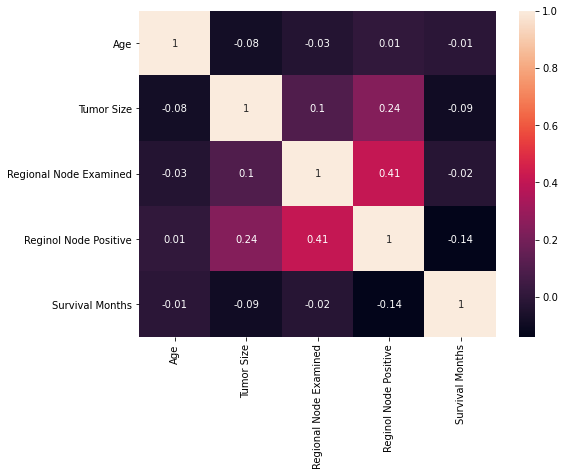

In [112]:
plt.figure(figsize = (8,6))
sns.heatmap(Cancer_set.corr().round(2)  , annot=True)

## Featuer Engineering

In [113]:
def TNM_Tumor_Stage(dataset , var1 , var2 , var3):
    TNM =dataset[var1] +"-"+ dataset[var2] +"-"+ dataset[var3]
    return TNM
Cancer_set["TNM Tumor Stage"]=TNM_Tumor_Stage(Cancer_set , 'T Stage ', 'N Stage', 'A Stage')

In [114]:
def Hormon_State(dataset , var1 , var2 ):
    return  ["ER-"] +  dataset[var1]+ " "+["PR-"]+dataset[var2]
Cancer_set["Hormon Status"]=Hormon_State(Cancer_set , 'Estrogen Status', 'Progesterone Status')

In [115]:
def Lymph_node_Ratio(dataset , var1  , var2):
    return round(dataset[var1] / dataset[var2] , 2)
Cancer_set["Lymph_Node_Ratio"]=Lymph_node_Ratio(Cancer_set , 'Reginol Node Positive', 'Regional Node Examined')

In [116]:
def tumor_size(tumor_size):
    if tumor_size <= 20:
        return "Small"
    elif 20< tumor_size <= 50:
        return "Medium"
    elif tumor_size > 50: 
        return "Large"
Cancer_set['Tumor Size Category'] = Cancer_set['Tumor Size'].apply(tumor_size)

In [117]:
def month_to_years(var):
        year_survived=var/12
        return round(year_survived , 1)
Cancer_set['Year_Survived'] = Cancer_set['Survival Months'].apply(month_to_years)

In [118]:
Cancer_set['Status'] = Cancer_set['Status'].map({"Alive":1 , "Dead":0})

In [119]:
Cancer_set.shape

(4024, 21)

## splitting_Train_Test

In [120]:
y=Cancer_set["Status"]
X=Cancer_set.drop('Status' , axis=1)
X_train , X_test , y_train , y_test=train_test_split(X , y , test_size=0.2 , random_state=42, stratify = y)

In [121]:
rf=RandomForestClassifier(n_estimators=600 , max_depth=17) # i found this values through GridSearchCV
xgboost=xgb.XGBClassifier()


## ColumnTransformer 

In [122]:
list_int=list(X_train[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive','Survival Months','Lymph_Node_Ratio' , 'Year_Survived']])
list_1hot=list(X_train[['Race', 'Marital Status', 'differentiate', 'Estrogen Status', 'Progesterone Status' , 'TNM Tumor Stage' , 'Hormon Status', ]])
list_ordinal=list(X_train[[ 'T Stage ', 'N Stage', '6th Stage', 'Grade', 'A Stage', 'Tumor Size Category']])


coltransformer= ColumnTransformer([ ('std'  ,StandardScaler() , list_int) , 
                                    ('1hot' ,OneHotEncoder() , list_1hot) , 
                                     ('ordinal', OrdinalEncoder(), list_ordinal), 
                                  ])

In [123]:
X_train_pre=coltransformer.fit_transform(X_train)

In [124]:
X_train_pre=pd.DataFrame(X_train_pre)

In [125]:
X_train_pre.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,1.232226,0.068319,-1.522086,-0.621565,0.388406,0.614026,0.406039,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
1,1.121056,-0.926358,-1.278367,-0.425291,1.215770,0.614026,1.189730,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0
2,-0.991168,-0.736896,1.158817,-0.621565,0.388406,-0.991705,0.406039,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,2.0
3,0.454038,-0.026412,0.427662,-0.621565,-2.050142,-0.921891,-2.049526,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0,1.0,1.0
4,-0.212980,0.447243,-0.669071,-0.425291,0.257769,-0.363375,0.249301,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,1.0,1.0


In [126]:
smote = SMOTE(random_state=42) # i used to address class imbalance in a dataset.
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pre, y_train)

In [127]:
## xgboost
y_pred=cross_val_predict(xgboost ,X_train_resampled ,  y_train_resampled , cv=5)
print(f"precision score is : {precision_score(y_train_resampled , y_pred)}")
print(f"recall score  is : {recall_score(y_train_resampled , y_pred)}")

precision score is : 0.9023719491234101
recall score  is : 0.9629493763756419


In [129]:
## RandomForest
rf.fit(X_train_resampled ,  y_train_resampled )
y_pred_1=cross_val_predict(rf ,X_train_resampled ,  y_train_resampled , cv=5)
print(f"precision score is : {precision_score(y_train_resampled , y_pred)}")
print(f"recall score  is : {recall_score(y_train_resampled , y_pred)}")

precision score is : 0.9023719491234101
recall score  is : 0.9629493763756419


In [86]:
y_probs = cross_val_predict(xgboost,X_train_resampled ,  y_train_resampled, cv=5, method='predict_proba')[:, 1]

threshold = 0.3
y_pred = (y_probs >= threshold).astype(int)

recall = recall_score(y_train_resampled, y_pred)
precision = precision_score(y_train_resampled, y_pred)
confusionmatrix=confusion_matrix(y_train_resampled, y_pred)
                                  
print(f"confusion matrix:")
print(confusionmatrix)
print(f"Recall: {recall}")
print(f"Precision: {precision}")

confusion matrix:
[[2362  364]
 [  60 2666]]
Recall: 0.9779897285399853
Precision: 0.8798679867986798


In a clinical dataset, the recall score is often more important than other metrics, especially in situations where the consequences of false negatives (i.e., incorrectly predicting a negative outcome when it is positive) are severe.



In [134]:
X_test_pre=coltransformer.transform(X_test)

In [135]:
y_pred = rf.predict(X_test_pre)

In [137]:
 recall_score(y_test, y_pred)

0.9501466275659824